**Music Genre Classification**
**Importing The Necessary Libraries**


In [ ]:
!pip install IPython
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


**Importing the Data From the Folder**

In [ ]:
music_data = pd.read_csv('/content/drive/MyDrive/Music Genre Dataset/file.csv')
music_data.head(5)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**EDA**
To Count the count in each lable

In [ ]:
music_data['label'].value_counts()


,count
label,
blues,100
classical,100
country,100
disco,100
hiphop,100
jazz,100
metal,100
pop,100
reggae,100


**Visualizing The Audio**

Classical


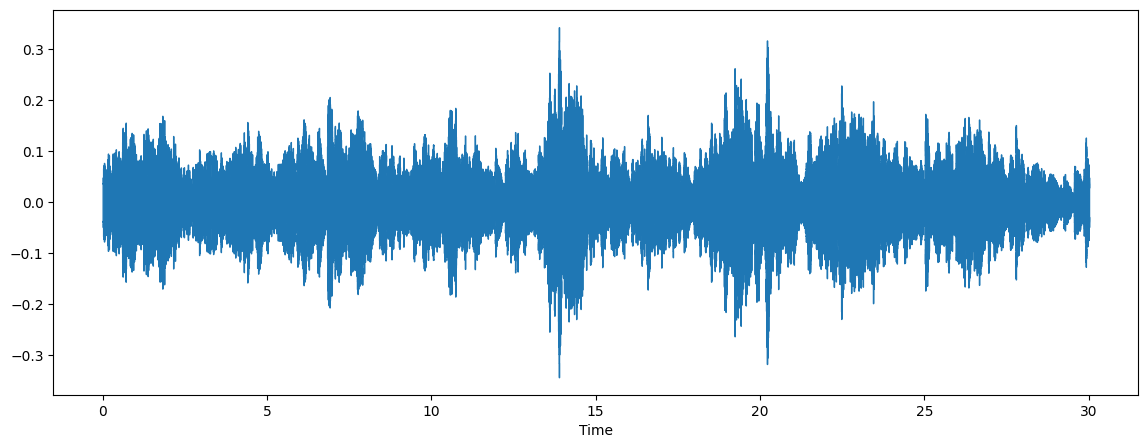

In [ ]:
path = '/content/drive/MyDrive/Music Genre Dataset/genres_original-20240818T095335Z-001/genres_original/classical/classical.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr)
ipd.Audio(path)

print("Classical")


Blue


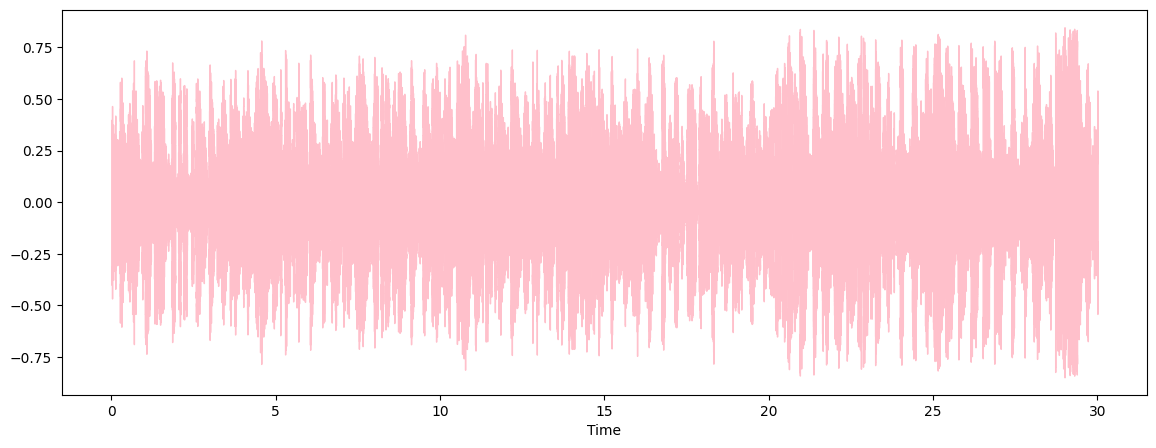

In [ ]:
path = '/content/drive/MyDrive/Music Genre Dataset/genres_original-20240818T095335Z-001/genres_original/blues/blues.00002.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr,color = 'pink')
ipd.Audio(path)

print("Blue")


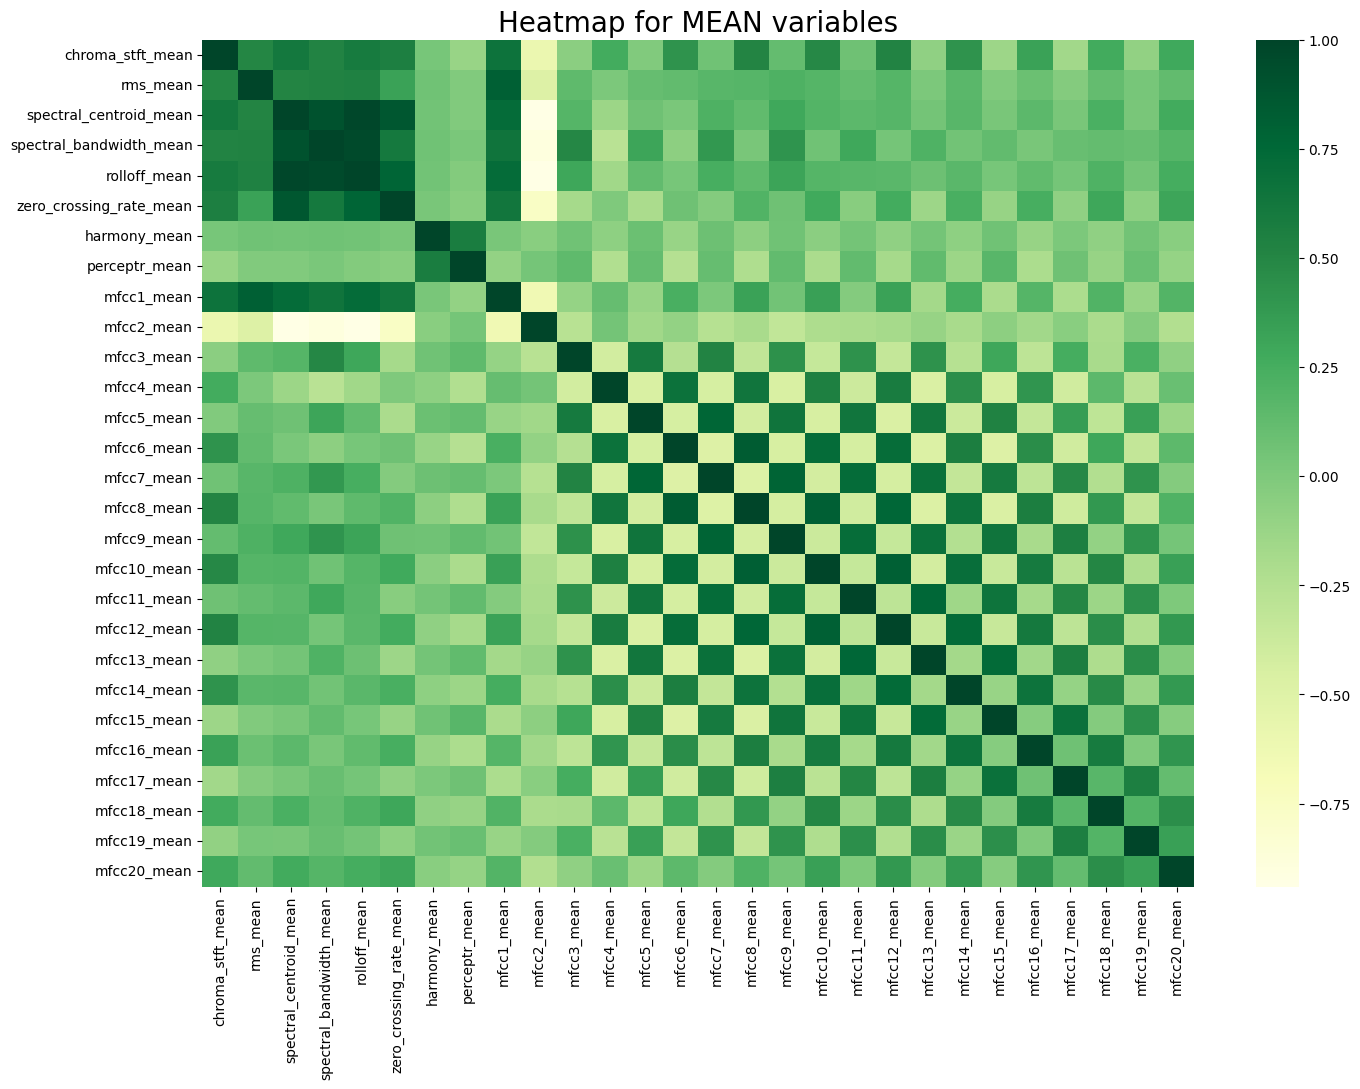

In [ ]:
import numpy as np
import seaborn as sns

# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
music_data['label'] = label_encoder.fit_transform(music_data['label'])


In [ ]:
X = music_data.drop(['label','filename'],axis=1)
y = music_data['label']


In [ ]:
cols = X.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size=0.3,
													random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((700, 58), (300, 58), (700,), (300,))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Classifiers
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)

# List of classifiers
for clf in (rf, knn, lr):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, preds))


RandomForestClassifier 0.78
KNeighborsClassifier 0.7033333333333334
LogisticRegression 0.6733333333333333


Classification Model

In [ ]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import joblib

# Function to extract features from an audio file
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        spectral_contrast = librosa.feature.spectral_contrast(S=np.abs(librosa.stft(audio)), sr=sample_rate)

        # Combine all features into a single feature vector
        features = np.hstack([
            np.mean(mfccs.T, axis=0),
            np.mean(chroma.T, axis=0),
            np.mean(mel.T, axis=0),
            np.mean(spectral_contrast.T, axis=0)
        ])

        return features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}")
        return None

# Path to the dataset
dataset_path = '/content/drive/MyDrive/Music Genre Dataset/genres_original-20240818T095335Z-001/genres_original'

# Dictionary to hold the features and labels
features = []
labels = []

# Loop through each genre folder
for genre in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            file_path = os.path.join(genre_path, file)
            if file_path.endswith('.wav'):
                data = extract_features(file_path)
                if data is not None:
                    features.append(data)
                    labels.append(genre)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

# Check if features and labels were extracted
print("Number of extracted features:", len(features))
print("Number of extracted labels:", len(labels))

# Split the dataset into training and testing sets
if len(features) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVM model with hyperparameter tuning
    pipeline = make_pipeline(StandardScaler(), SVC())

    # Define a set of hyperparameters to tune
    param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'poly', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Save the trained model
    best_model = grid_search.best_estimator_
    joblib.dump(best_model, 'best_genre_classifier.pkl')

    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Optimized Model Accuracy: {accuracy * 100:.2f}%")
else:
    print("No features were extracted. Check your dataset path and file formats.")


Number of extracted features: 999
Number of extracted labels: 999
Optimized Model Accuracy: 72.00%


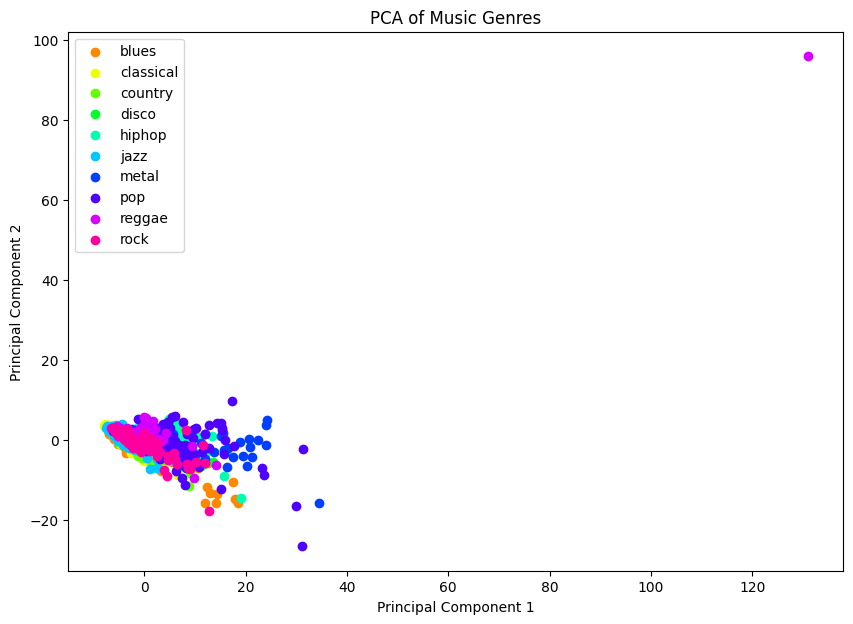

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Visualize the PCA components
def plot_pca(X_pca, y):
    # Map genres to colors for visualization
    unique_labels = np.unique(y)
    palette = sns.color_palette('hsv', len(unique_labels))
    color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

    plt.figure(figsize=(10, 7))
    for label in unique_labels:
        indices = np.where(y == label)
        plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label, c=[color_map[label]])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Music Genres')
    plt.legend(loc='best')
    plt.show()

# Step 4: Call the function to plot the PCA result
plot_pca(X_pca, y)


In [ ]:
joblib.dump(model, 'best_genre_classifier.pkl')



['best_genre_classifier.pkl']

In [ ]:
from google.colab import files
files.download('best_genre_classifier.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>